In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2

In [8]:
video_stream = cv2.VideoCapture(0)
while video_stream.isOpened():
    success, image = video_stream.read()
    print(image.shape)

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1

KeyboardInterrupt: 

In [47]:
# Model / data parameters
num_classes = 10 # 0-9

input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

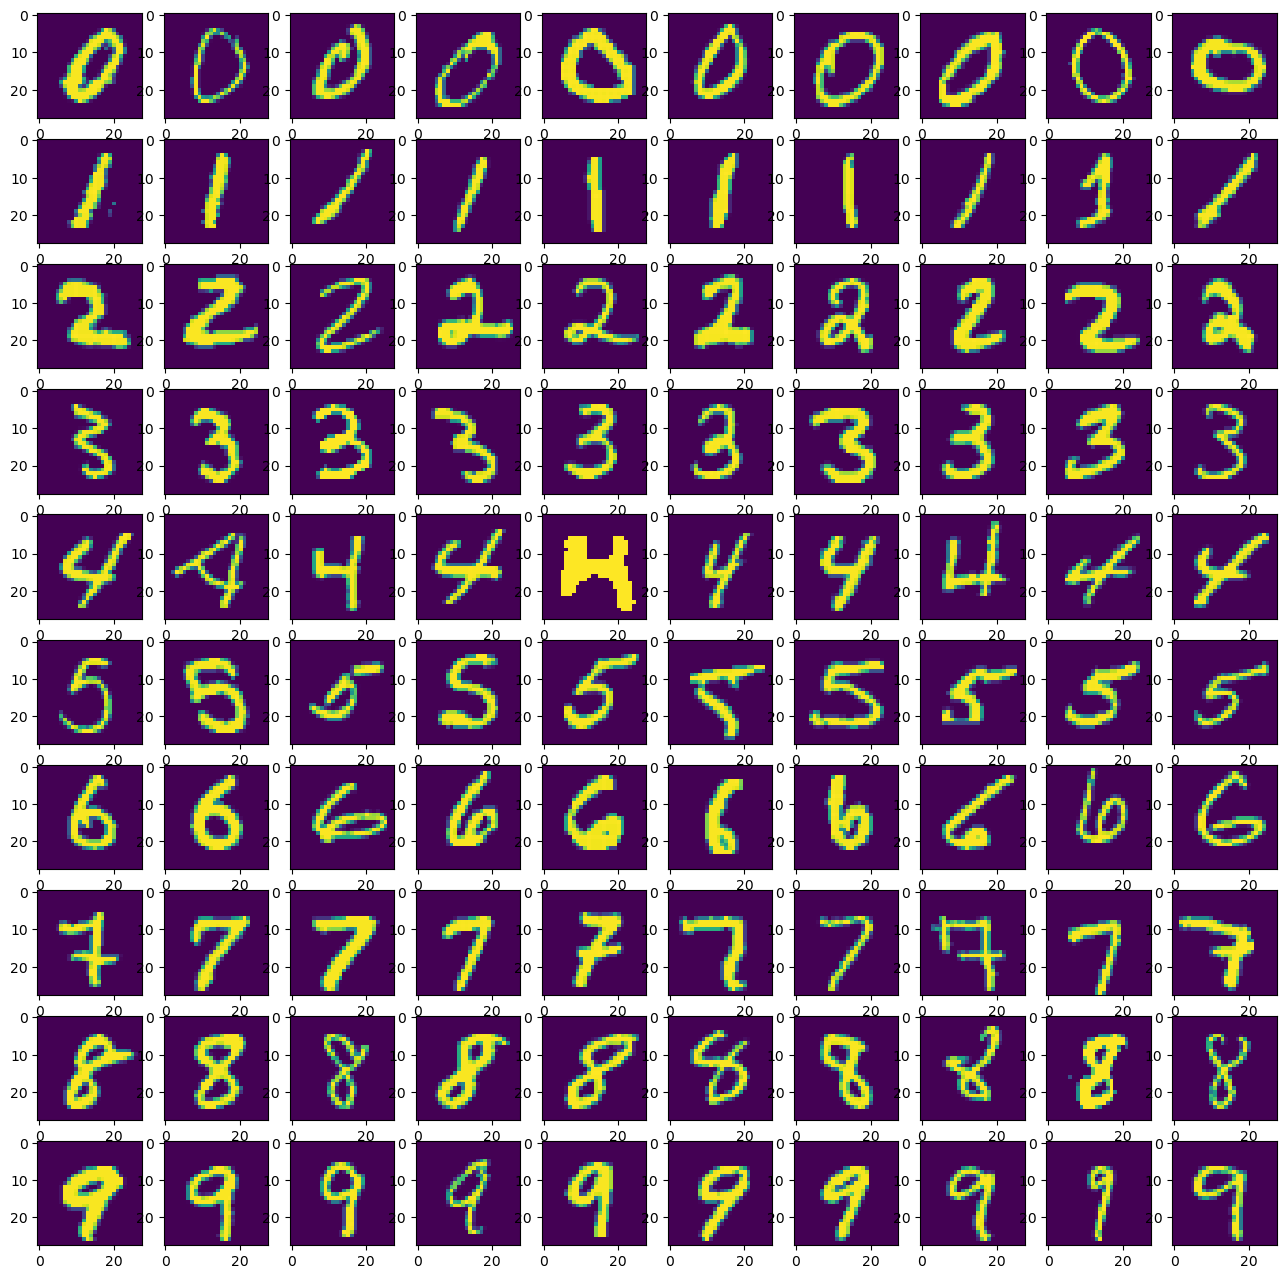

In [50]:
rows = 10
cols = 10
fig, ax = plt.subplots(rows, cols, figsize=(16, 16))
for row in range(rows):
    idx_y = np.where(y_train == row)[0]
    np.random.seed(2023)
    idx_y_chosen = np.random.choice(len(idx_y), 10, replace=False)
    # print(len(idx_y_chosen))
    for col in range(cols):
        ax[row, col].imshow(x_train[idx_y[idx_y_chosen[col]]])
plt.show()

In [51]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [52]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [68]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # layers.MaxPooling2D(pool_size=(2, 2)),
        # layers.Conv2D(32, kernel_size=(2, 2), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_7 (Dropout)         (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

In [69]:
batch_size = 128
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
  1/422 [..............................] - ETA: 1:51 - loss: 2.2861 - accuracy: 0.1797

2023-02-17 17:57:05.727709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


421/422 [============================>.] - ETA: 0s - loss: 0.4395 - accuracy: 0.8787

2023-02-17 17:57:10.284791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 5s 11ms/step - loss: 0.4390 - accuracy: 0.8788 - val_loss: 0.1794 - val_accuracy: 0.9505
Epoch 2/10
422/422 [==============================] - 5s 11ms/step - loss: 0.1975 - accuracy: 0.9420 - val_loss: 0.1163 - val_accuracy: 0.9685
Epoch 3/10
422/422 [==============================] - 4s 10ms/step - loss: 0.1425 - accuracy: 0.9585 - val_loss: 0.0924 - val_accuracy: 0.9770
Epoch 4/10
422/422 [==============================] - 4s 11ms/step - loss: 0.1191 - accuracy: 0.9651 - val_loss: 0.0817 - val_accuracy: 0.9792
Epoch 5/10
422/422 [==============================] - 4s 10ms/step - loss: 0.1047 - accuracy: 0.9690 - val_loss: 0.0719 - val_accuracy: 0.9807
Epoch 6/10
422/422 [==============================] - 4s 11ms/step - loss: 0.0944 - accuracy: 0.9713 - val_loss: 0.0689 - val_accuracy: 0.9820
Epoch 7/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0855 - accuracy: 0.9743 - val_loss: 0.0701 - val_accuracy: 0.9827
Epoch 8/10

In [70]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05764165148139
Test accuracy: 0.9812000393867493


In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6


2023-02-17 17:15:33.831724: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-17 17:15:33.835992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3533 - sparse_categorical_accuracy: 0.9029

2023-02-17 17:15:37.775835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 4s 5ms/step - loss: 0.3533 - sparse_categorical_accuracy: 0.9029 - val_loss: 0.1915 - val_sparse_categorical_accuracy: 0.9457
Epoch 2/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1622 - sparse_categorical_accuracy: 0.9547 - val_loss: 0.1344 - val_sparse_categorical_accuracy: 0.9614
Epoch 3/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1174 - sparse_categorical_accuracy: 0.9662 - val_loss: 0.1078 - val_sparse_categorical_accuracy: 0.9673
Epoch 4/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0908 - sparse_categorical_accuracy: 0.9738 - val_loss: 0.0992 - val_sparse_categorical_accuracy: 0.9702
Epoch 5/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0742 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0921 - val_sparse_categorical_accuracy: 0.9713
Epoch 6/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0610 - sparse_categorical_accuracy: 0.98

In [27]:
if np.max(yes_label) == 0:
    print(np.argmax(no_label))
else:
    print(np.argmax(yes_label)+1)


1


In [5]:
categories.APPLICATION_CATEGORIES_BY_COLUMN[0]

['Video Upload']

In [8]:
import streamlit as st
import cv2
@st.cache(allow_output_mutation=True)
def get_cap(location):
    print("Loading in function", str(location))
    video_stream = cv2.VideoCapture(str(location))
    total = int(video_stream.get(cv2.CAP_PROP_FRAME_COUNT))
    # Check if camera opened successfully
    if video_stream.isOpened() == False:
        print("Error opening video  file")
    return video_stream, total

In [9]:
video_stream = cv2.VideoCapture('../temp_video_0.mp4')
video_stream

< cv2.VideoCapture 0x15280b310>

In [10]:
video_stream.get(cv2.CAP_PROP_FRAME_COUNT)

3403.0

In [24]:
ret, image = video_stream.read()
ret

True

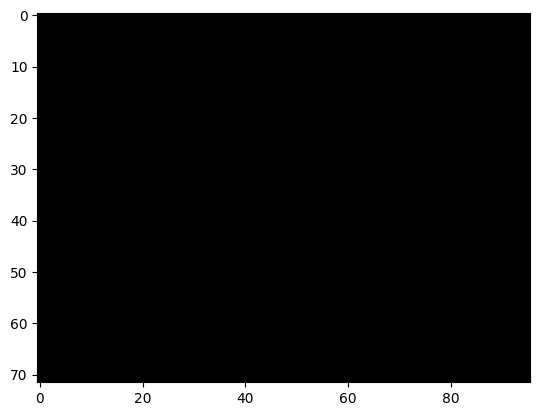

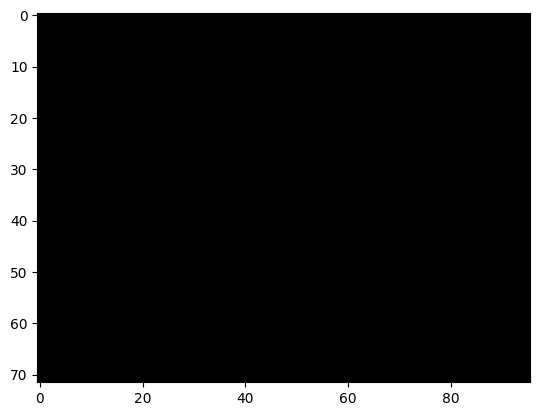

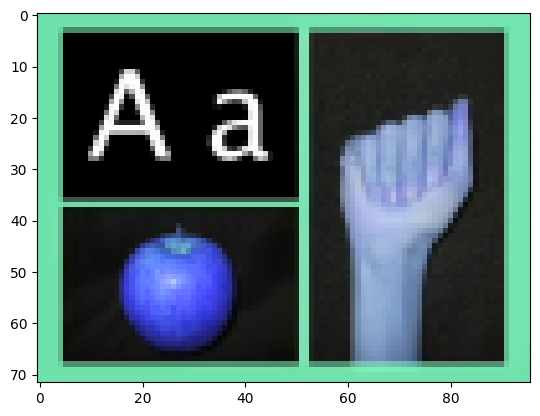

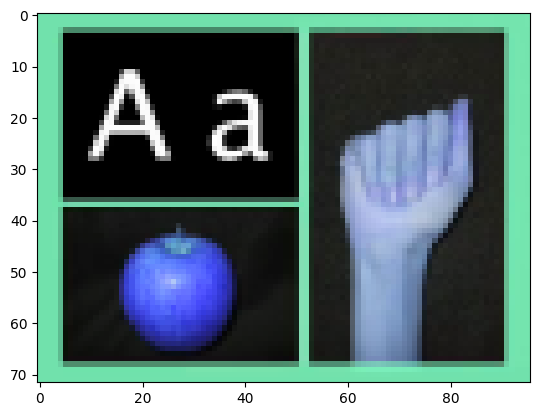

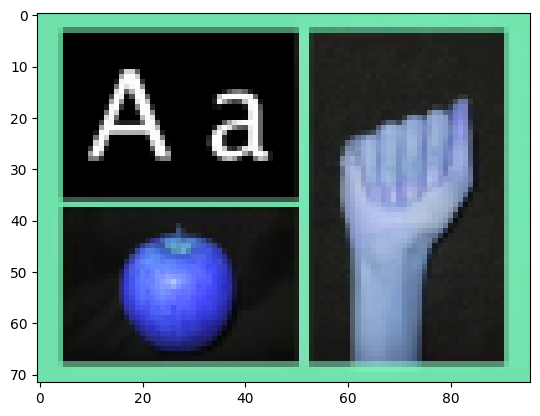

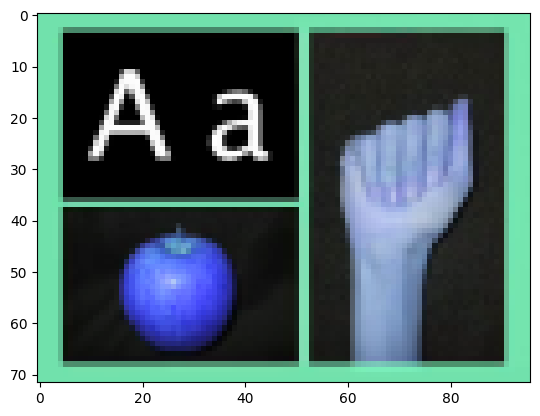

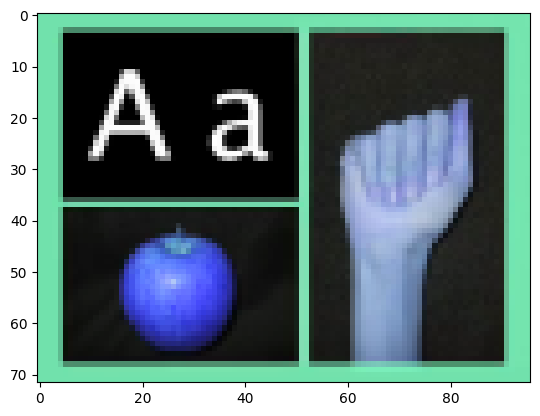

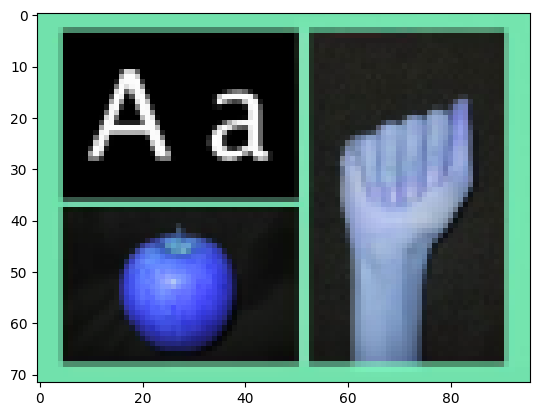

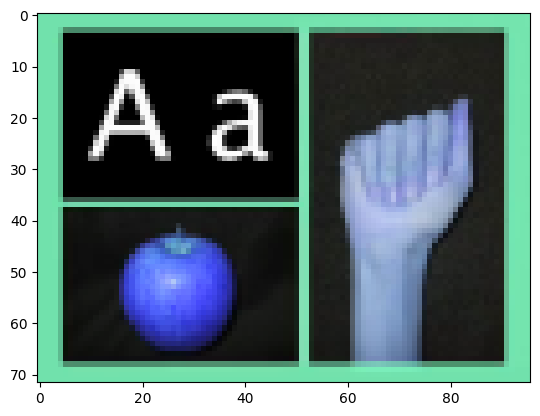

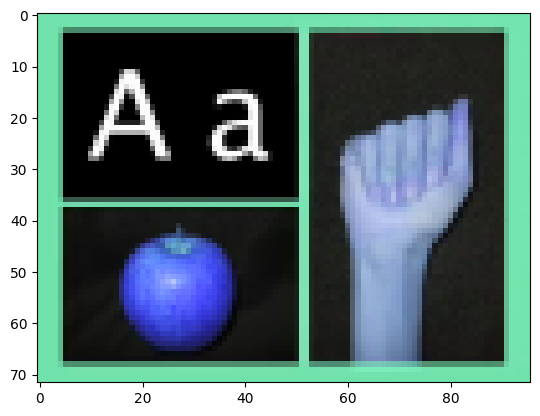

In [25]:
scale_ = 0.2
for i in range(100):
    ret, image = video_stream.read()
    image = cv2.resize(image, None,
                       fx=scale_, fy=scale_,
                       interpolation=cv2.INTER_AREA)
    if i % 10 == 0:
        fig, ax = plt.subplots(1, 1)
        ax.imshow(image)


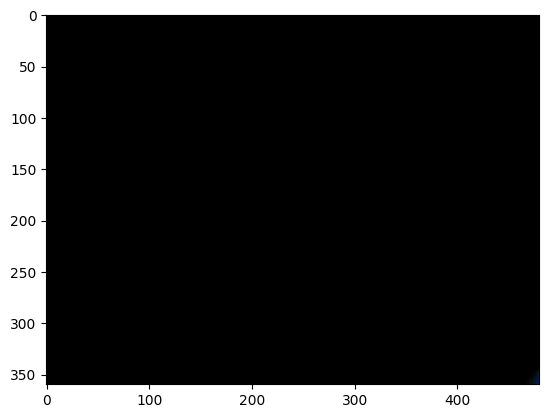

In [21]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [12]:
import numpy as np
hand_pose = np.zeros((21, 3))

In [14]:
hand_pose[0, :] = [10, 20, 10]
hand_pose

array([[10., 20., 10.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [29]:
hand_pose = np.zeros((21, 3))
hand_pose

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [30]:
hand_pose_copy = hand_pose.copy()
hand_pose_copy[0, :] = [10, 20, 10]
hand_pose_copy

array([[10., 20., 10.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [33]:
idx = 200
hand_poses = np.hstack([idx, np.hstack(hand_pose)])
hand_poses

array([200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])